# Visualization Tutorial

### Leonardo Alchieri, Università della Svizzera Italiana

#### 10 Nov 2025, Istituto Nazionale dei Tumori, Milano

## Example Description

I simulated data for a clinical trial. We have 100 patients randomized to three arms: High-dose treatment, Low-dose treatment and Placebo (control). We measure two biomarkers at 5 time points: 0, 1, 2, 4, 5. The actual value of the timepoints is not important for the tutorial. We separate the patients into responders and non-responders, based on their response to the treatment.

**Disclaimer**: The data is completely simulated and does not represent any real clinical trial.

You can find the data in `./data/clinical-example-1.xlsx`

### What we will do

- Learn how to load data from Excel
- Learn how to manipulate data with `pandas` library
- Learn how to create displots with the `seaborn` library
- Learn how to create lineplots with the `seaborn` library
- Learn how to create boxplots with the `seaborn` library

# Necessary Packages

## You need to install the following packages

- `pandas`
- `seaborn`
- `matplotlib`
- `openpyxl`

### Do you remember how to install packages?

### Double check that everything is working as expected

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading and exploring the data

In [25]:
data = pd.read_excel('./data/clinical-example-1.xlsx')
display(data.head())

,ID,ARM,TimePoint,Risposta,Basophils,Neutrophils
0,1,High Dose,1,Responder,12018.795950,11347.932198
1,1,High Dose,2,Responder,30001.500000,12000.600000
2,1,High Dose,3,Responder,18000.900000,45002.250000
3,1,High Dose,4,Responder,24001.200000,24001.200000
4,1,High Dose,5,Responder,44291.937567,74879.138932


### Calculate the average Basophils count for each time point, for the "High-dose" treatment arm and "Responders" only

In [26]:
data_subset = data[(data["ARM"] == "High Dose") 
                   & (data["Risposta"] == "Responder")]
display(data_subset.head())

,ID,ARM,TimePoint,Risposta,Basophils,Neutrophils
0,1,High Dose,1,Responder,12018.795950,11347.932198
1,1,High Dose,2,Responder,30001.500000,12000.600000
2,1,High Dose,3,Responder,18000.900000,45002.250000
3,1,High Dose,4,Responder,24001.200000,24001.200000
4,1,High Dose,5,Responder,44291.937567,74879.138932


In [27]:
for time_point in data_subset['TimePoint'].unique():
    
    subset_tp = data_subset[data_subset['TimePoint'] == time_point]
    
    mean_basophils = subset_tp['Basophils'].mean()
    
    print(f"TimePoint: {time_point}, Mean Basophils: {mean_basophils}")

TimePoint: 1, Mean Basophils: 9240.681433352906
TimePoint: 2, Mean Basophils: 24609.98379946011
TimePoint: 3, Mean Basophils: 31806.29161610137
TimePoint: 4, Mean Basophils: 44363.590760421095
TimePoint: 5, Mean Basophils: 59920.953483363526


# Plotting Distributions

`Seaborn` is a high-level data visualization library. Seaborn relies on the `pandas` DataFrame structure.

### Plot distribution of "Basophils" count for Non-Responders at TimePoint 2, for the "Low Dose" treatment arm

In [28]:
data_subset = data[
    (data["ARM"] == "Low Dose")
    & (data["Risposta"] == "Non-Responder")
    & (data["TimePoint"] == 2)
]
display(data_subset.head())

,ID,ARM,TimePoint,Risposta,Basophils,Neutrophils
26,6,Low Dose,2,Non-Responder,5000.000000,20000.000000
71,15,Low Dose,2,Non-Responder,5000.000000,20000.000000
91,19,Low Dose,2,Non-Responder,18003.309561,20000.000000
116,24,Low Dose,2,Non-Responder,15214.789552,14599.914729
131,27,Low Dose,2,Non-Responder,15946.453460,5000.000000


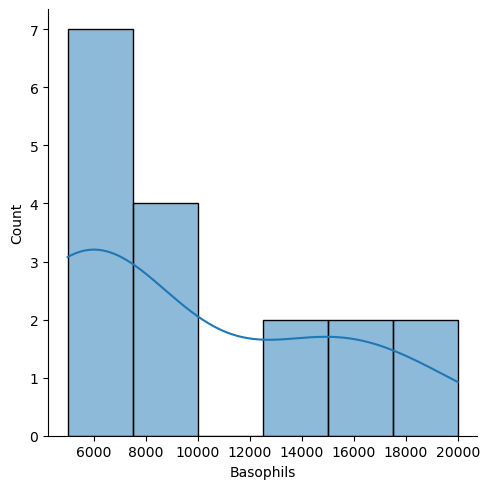

In [30]:
sns.displot(data=data_subset, x="Basophils", kde=True)
plt.show()

### You can use `displot` to also have 2D distributions

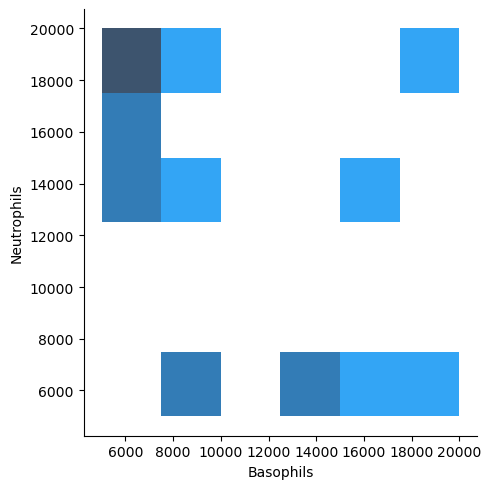

In [35]:
sns.displot(data=data_subset, x="Basophils", y="Neutrophils")
plt.show()

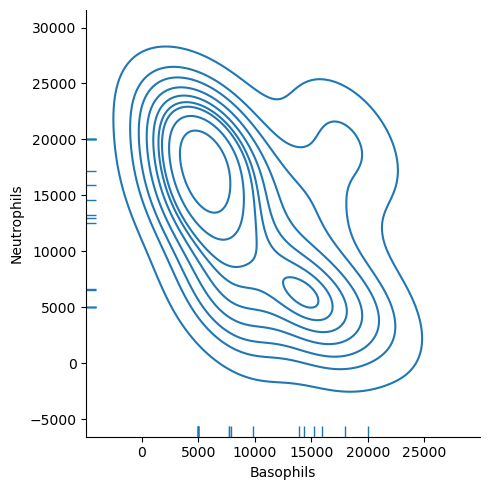

In [36]:
sns.displot(data=data_subset, x="Basophils", y="Neutrophils", kind='kde', rug=True)
plt.show()

### Seaborn also allows to easily plot the distrbution across multiple categories

Let's compare the distributions of Basophils count at TimePoint 2, for Responders and Non-Responders, in the "Low Dose" treatment arm

In [37]:
data_subset = data[
    (data["ARM"] == "Low Dose")
    & (data["TimePoint"] == 2)
]
display(data_subset.head())

,ID,ARM,TimePoint,Risposta,Basophils,Neutrophils
6,2,Low Dose,2,Responder,10005.000000,10005.0
26,6,Low Dose,2,Non-Responder,5000.000000,20000.0
46,10,Low Dose,2,Responder,39369.781543,10005.0
61,13,Low Dose,2,Responder,40020.000000,40020.0
71,15,Low Dose,2,Non-Responder,5000.000000,20000.0


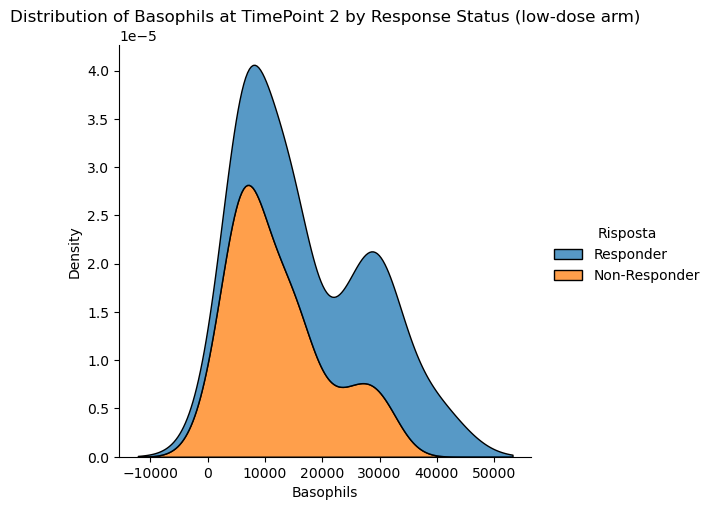

In [61]:
sns.displot(
    data=data_subset, 
    x="Basophils", 
    kind="kde", 
    hue="Risposta", 
    multiple="stack"
)
plt.title("Distribution of Basophils at TimePoint 2 by Response Status (low-dose arm)")
plt.show()

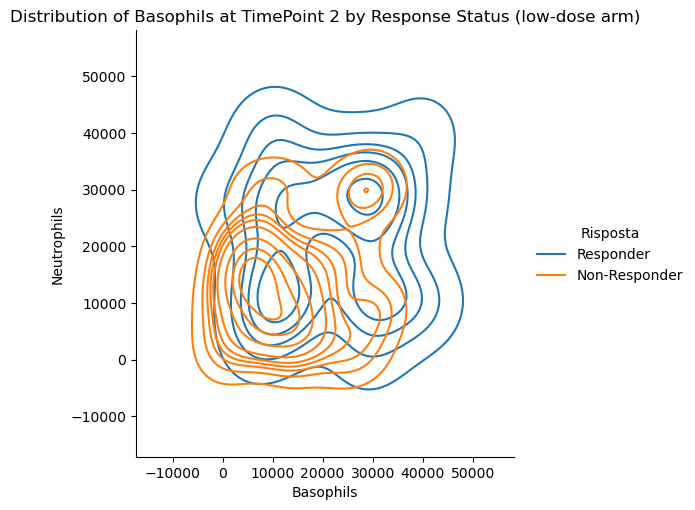

In [62]:
sns.displot(
    data=data_subset, 
    x="Basophils", 
    y="Neutrophils", 
    kind="kde", 
    hue="Risposta"
)
plt.title("Distribution of Basophils at TimePoint 2 by Response Status (low-dose arm)")
plt.show()

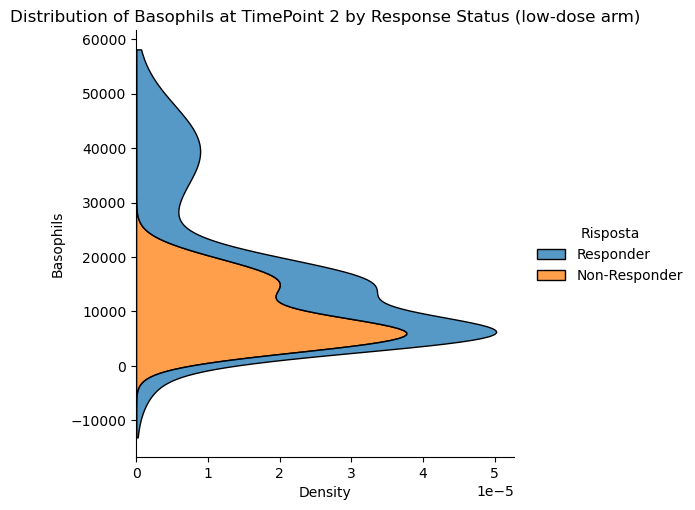

In [47]:
sns.displot(data=data_subset, y="Basophils", kind='kde', hue="Risposta", multiple="stack")
plt.title("Distribution of Basophils at TimePoint 2 by Response Status (low-dose arm)")
plt.show()

### Making sub-plots automatically

`Seaborn` allows to create subplots automatically, using the `col` and `row` arguments in `displot`.

Let's plot now the distribution of Basophils count at TimePoint 2, for Responders and Non-Responders, for all types of treatment arms.

In [48]:
data_subset = data[
    (data["TimePoint"] == 2)
]
display(data_subset.head())

,ID,ARM,TimePoint,Risposta,Basophils,Neutrophils
1,1,High Dose,2,Responder,30001.500000,12000.600000
6,2,Low Dose,2,Responder,10005.000000,10005.000000
11,3,High Dose,2,Responder,12000.600000,30001.500000
16,4,High Dose,2,Responder,27237.592806,30001.500000
21,5,High Dose,2,Responder,30001.500000,29447.297843


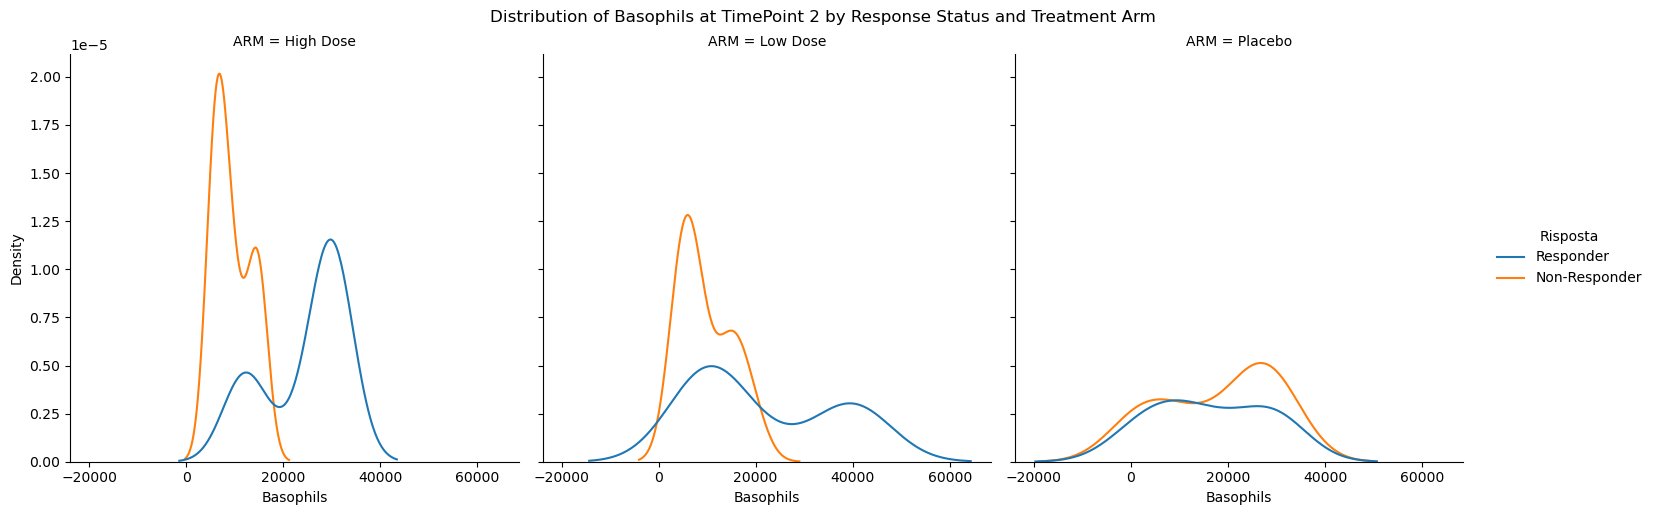

In [64]:
sns.displot(
    data=data_subset,
    x="Basophils", 
    kind='kde', 
    hue="Risposta",
    col='ARM'
    )

plt.suptitle("Distribution of Basophils at TimePoint 2 by Response Status and Treatment Arm", y=1.02)
plt.savefig("data/displot_facet_arm.pdf", bbox_inches='tight')
plt.show()

## Your turn!

Now, try to plot the distribution of "Neutrophils" for Responders and Non-Responders, at all timepoints (rows) and for all treatment arms (columns).

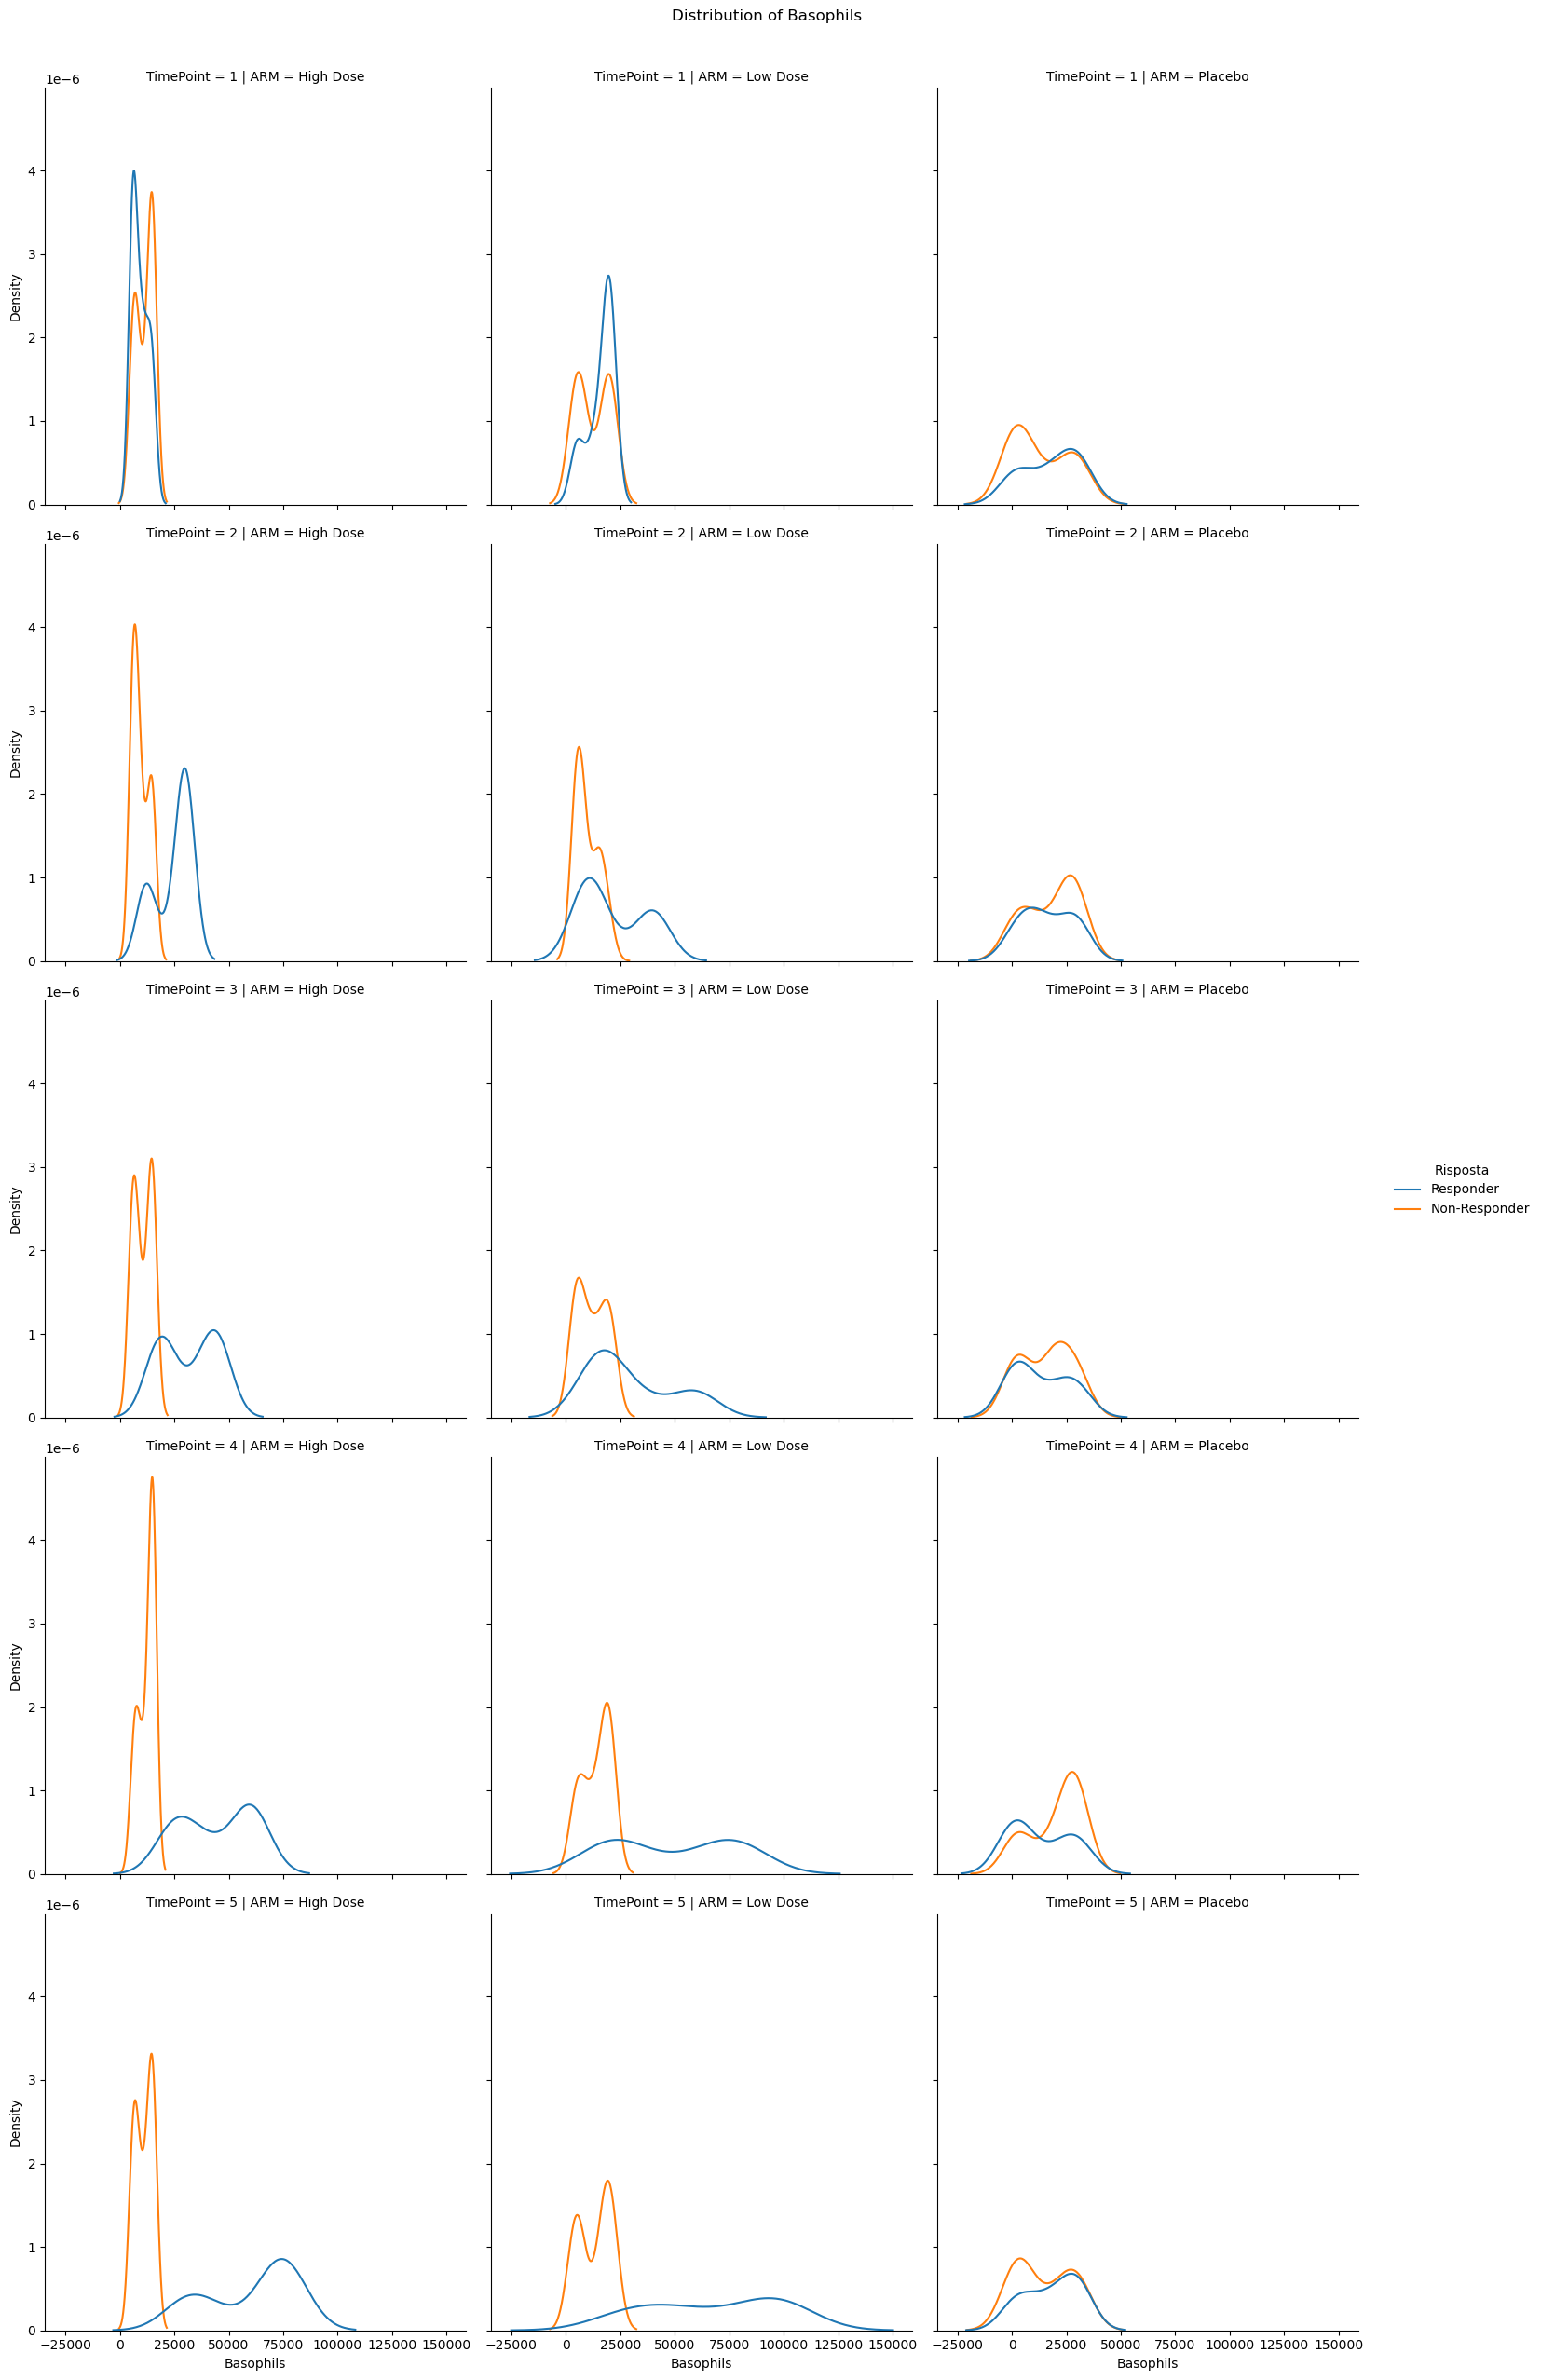

In [63]:
sns.displot(
    data=data,
    x="Basophils", 
    kind='kde', 
    hue="Risposta",
    col='ARM',
    row='TimePoint'
    )

plt.suptitle("Distribution of Basophils", y=1.02)
plt.show()